<a href="https://colab.research.google.com/github/sholami/sholami/blob/main/Tsetscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 94.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=57dc6163367066a0ef427072d0134d4cb3773bb09b0eed23c4f1f67a380b119d
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=42a16e40bdf298979caf99ddbfedf459394982a002699247f6786a758be669ec
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [10]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pingouin
import seaborn as sn

#Technical and Trade Schools

Technical_df = pd.read_html(
    requests.get("https://www.bls.gov/oes/current/naics4_611500.htm").text,
    flavor="bs4",
)

technical_df = Technical_df[-1]
technical_df.head()


,Occupation code,Occupation title (click on the occupation title to view an occupational profile),Level,Employment,Employment RSE,Percent of total employment,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0000,All Occupations,total,130690,0.0%,100.00%,$24.46,$29.63,"$61,640",0.7%
2,11-0000,Management Occupations,major,12770,2.0%,9.77%,$37.93,$43.64,"$90,780",1.3%
3,11-1000,Top Executives,minor,3460,4.8%,2.65%,$38.40,$45.91,"$95,480",2.8%
4,11-1011,Chief Executives,detail,240,19.9%,0.18%,$57.41,$69.91,"$145,400",6.3%


In [11]:
technical_df['Edu_type'] = 'technical'
technical_df = technical_df.rename(columns={"Level": "Group"})
technical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 11 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Occupation code                                                                   321 non-null    object
 1   Occupation title (click on the occupation title to view an occupational profile)  321 non-null    object
 2   Group                                                                             321 non-null    object
 3   Employment                                                                        321 non-null    object
 4   Employment RSE                                                                    321 non-null    object
 5   Percent of total employment                                                       321 non-null    object
 6   Median hou

In [12]:
# traditional education
College_df = pd.read_html(
    requests.get("https://www.bls.gov/oes/2019/may/naics4_611300.htm").text,
    flavor="bs4",
)

college_df = College_df[-1]
college_df['Edu_type'] = 'college'
college_df.head()

,Occupation code,Occupation title (click on the occupation title to view an occupational profile),Group,Employment,Employment RSE,Percent of total employment,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,college
1,00-0000,All Occupations,total,3088910,1.2%,100.00%,$27.84,$34.30,"$71,340",0.7%,college
2,11-0000,Management Occupations,major,233600,1.2%,7.56%,$47.78,$55.53,"$115,490",0.6%,college
3,11-1000,Top Executives,minor,17380,2.1%,0.56%,$57.15,$68.21,"$141,870",1.2%,college
4,11-1011,Chief Executives,detail,2440,2.7%,0.08%,(5),$109.21,"$227,150",1.3%,college


In [13]:
# merge the two dataframes - technical and college dataframes
df = pd.concat([technical_df, college_df])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Occupation code                                                                   1076 non-null   object
 1   Occupation title (click on the occupation title to view an occupational profile)  1076 non-null   object
 2   Group                                                                             1076 non-null   object
 3   Employment                                                                        1076 non-null   object
 4   Employment RSE                                                                    1076 non-null   object
 5   Percent of total employment                                                       1076 non-null   object
 6   Median ho

In [15]:
df.head()

,Occupation code,Occupation title (click on the occupation title to view an occupational profile),Group,Employment,Employment RSE,Percent of total employment,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,technical
1,00-0000,All Occupations,total,130690,0.0%,100.00%,$24.46,$29.63,"$61,640",0.7%,technical
2,11-0000,Management Occupations,major,12770,2.0%,9.77%,$37.93,$43.64,"$90,780",1.3%,technical
3,11-1000,Top Executives,minor,3460,4.8%,2.65%,$38.40,$45.91,"$95,480",2.8%,technical
4,11-1011,Chief Executives,detail,240,19.9%,0.18%,$57.41,$69.91,"$145,400",6.3%,technical


In [16]:
#the occupation defination is too long, jus shortenen the name
df = df.rename(columns={"Occupation title (click on the occupation title to view an occupational profile)" :"Occupation"})
df.drop(["Occupation code"], axis=1, inplace = True)

In [17]:
df = df.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 755
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Occupation                   1076 non-null   string
 1   Group                        1076 non-null   string
 2   Employment                   1076 non-null   string
 3   Employment RSE               1076 non-null   string
 4   Percent of total employment  1076 non-null   string
 5   Median hourly wage           1076 non-null   string
 6   Mean hourly wage             1076 non-null   string
 7   Annual mean wage             1076 non-null   string
 8   Mean wage RSE                1076 non-null   string
 9   Edu_type                     1078 non-null   string
dtypes: string(10)
memory usage: 92.6 KB


In [31]:
# for all occupation
df_tableau = df[['Occupation', 'Group', 'Annual mean wage', 'Edu_type']].dropna()
df_tableau = df_tableau[(df_tableau.Group == 'total') | (df_tableau.Group == 'major') | (df_tableau.Group == 'minor')]
df_tableau["Annual mean wage"] = df_tableau["Annual mean wage"].str.replace("$","",regex=False).str.replace(",","",regex=False).astype(int)
df_tableau

,Occupation,Group,Annual mean wage,Edu_type
1,All Occupations,total,61640,technical
2,Management Occupations,major,90780,technical
3,Top Executives,minor,95480,technical
6,"Advertising, Marketing, Promotions, Public Rel...",minor,125760,technical
11,Operations Specialties Managers,minor,102190,technical
...,...,...,...,...
724,Air Transportation Workers,minor,66160,college
730,Motor Vehicle Operators,minor,37330,college
739,Water Transportation Workers,minor,66730,college
744,Other Transportation Workers,minor,31600,college


In [36]:
df_tableau.to_csv(r'C:\Users\shola\Downloads\df_tableau.csv')

In [37]:
df.Group.value_counts()

detail    698
broad     206
minor     127
major      43
total       2
Name: Group, dtype: Int64

In [38]:
df.head()

,Occupation,Group,Employment,Employment RSE,Percent of total employment,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,technical
1,All Occupations,total,130690,0.0%,100.00%,$24.46,$29.63,"$61,640",0.7%,technical
2,Management Occupations,major,12770,2.0%,9.77%,$37.93,$43.64,"$90,780",1.3%,technical
3,Top Executives,minor,3460,4.8%,2.65%,$38.40,$45.91,"$95,480",2.8%,technical
4,Chief Executives,detail,240,19.9%,0.18%,$57.41,$69.91,"$145,400",6.3%,technical


In [39]:
df.Occupation.value_counts().to_frame()

,Occupation
Cashiers,4
Electricians,2
Administrative Services and Facilities Managers,2
Computer and Information Systems Managers,2
Financial Managers,2
...,...
Helpers--Production Workers,1
Miscellaneous Production Workers,1
Photographic Process Workers and Processing Machine Operators,1
"Aircraft Service Attendants and Transportation Workers, All Other",1


In [40]:
#getting a better understanding of the data
df.describe()

,Occupation,Group,Employment,Employment RSE,Percent of total employment,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
count,1076,1076,1076,1076,1076,1076,1076,1076,1076,1078
unique,787,5,479,272,195,775,813,968,134,2
top,Cashiers,detail,50,(8),(7),(4),(4),(4),1.6%,college
freq,4,698,40,33,133,113,113,5,39,756


In [41]:
df.drop_duplicates()

,Occupation,Group,Employment,Employment RSE,Percent of total employment,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,technical
1,All Occupations,total,130690,0.0%,100.00%,$24.46,$29.63,"$61,640",0.7%,technical
2,Management Occupations,major,12770,2.0%,9.77%,$37.93,$43.64,"$90,780",1.3%,technical
3,Top Executives,minor,3460,4.8%,2.65%,$38.40,$45.91,"$95,480",2.8%,technical
4,Chief Executives,detail,240,19.9%,0.18%,$57.41,$69.91,"$145,400",6.3%,technical
...,...,...,...,...,...,...,...,...,...,...
751,Cleaners of Vehicles and Equipment,detail,70,9.1%,(7),$17.46,$17.57,"$36,550",3.1%,college
752,"Laborers and Freight, Stock, and Material Move...",detail,5080,2.8%,0.16%,$15.58,$16.10,"$33,490",1.7%,college
753,Stockers and Order Fillers,detail,3440,2.6%,0.11%,$17.42,$17.96,"$37,360",1.2%,college
754,Refuse and Recyclable Material Collectors,detail,280,3.5%,0.01%,$17.04,$18.33,"$38,130",2.2%,college


In [42]:
df = df[["Occupation",	"Group", 	"Median hourly wage",	"Mean hourly wage",	"Annual mean wage",	"Mean wage RSE", 	"Edu_type"]]
df

,Occupation,Group,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,technical
1,All Occupations,total,$24.46,$29.63,"$61,640",0.7%,technical
2,Management Occupations,major,$37.93,$43.64,"$90,780",1.3%,technical
3,Top Executives,minor,$38.40,$45.91,"$95,480",2.8%,technical
4,Chief Executives,detail,$57.41,$69.91,"$145,400",6.3%,technical
...,...,...,...,...,...,...,...
751,Cleaners of Vehicles and Equipment,detail,$17.46,$17.57,"$36,550",3.1%,college
752,"Laborers and Freight, Stock, and Material Move...",detail,$15.58,$16.10,"$33,490",1.7%,college
753,Stockers and Order Fillers,detail,$17.42,$17.96,"$37,360",1.2%,college
754,Refuse and Recyclable Material Collectors,detail,$17.04,$18.33,"$38,130",2.2%,college


In [43]:
df.groupby(['Edu_type', 'Group']).count()

Occupation  Median hourly wage  Mean hourly wage  \
Edu_type  Group                                                      
college   broad          134                 134               134   
          detail         526                 526               526   
          major           22                  22                22   
          minor           72                  72                72   
          total            1                   1                 1   
technical broad           72                  72                72   
          detail         172                 172               172   
          major           21                  21                21   
          minor           55                  55                55   
          total            1                   1                 1   

                  Annual mean wage  Mean wage RSE  
Edu_type  Group                                    
college   broad                134            134  
          detail               526            526  
          major                 22             22  
          minor                 72             72  
          total                  1              1  
technical broad                 72             72  
          detail               172            172  
          major                 21             21  
          minor                 55             55  
          total                  1              1

In [44]:
# for all occupation
df[df.Occupation == "All Occupations"]

,Occupation,Group,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
1,All Occupations,total,$24.46,$29.63,"$61,640",0.7%,technical
1,All Occupations,total,$27.84,$34.30,"$71,340",0.7%,college


In [45]:
# for all occupation
all_occ = df[df.Occupation == "All Occupations"][["Annual mean wage", "Edu_type"]]
all_occ["Annual mean wage"] = all_occ["Annual mean wage"].str.replace("$","",regex=False).str.replace(",","",regex=False).astype(int)


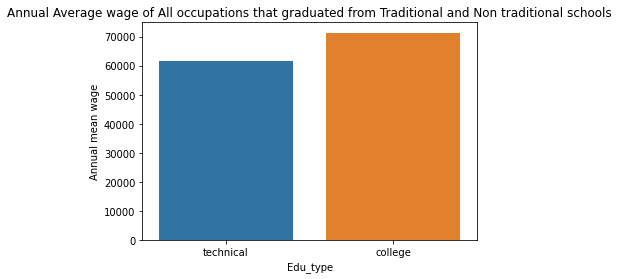

In [46]:
sn.barplot(x="Edu_type",y="Annual mean wage",data =all_occ)
plt.title("Annual Average wage of All occupations that graduated from Traditional and Non traditional schools")
plt.show()

In [47]:
# for major occupation
major_df = df[(df.Group == 'major') & (df.Occupation != 'Farming, Fishing, and Forestry Occupations')][['Occupation', 'Annual mean wage', 'Edu_type']]
major_df = major_df.astype('string')
major_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 2 to 721
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Occupation        42 non-null     string
 1   Annual mean wage  42 non-null     string
 2   Edu_type          42 non-null     string
dtypes: string(3)
memory usage: 1.3 KB


In [48]:
major_df1 = major_df.groupby(['Edu_type', 'Occupation'])[['Annual mean wage']].sum().reset_index()
major_df1['Annual mean wage'] = major_df1['Annual mean wage'].str.replace("$","",regex=False).str.replace(",","",regex=False).astype(int)
major_df1

,Edu_type,Occupation,Annual mean wage
0,college,Architecture and Engineering Occupations,74610
1,college,"Arts, Design, Entertainment, Sports, and Media...",60100
2,college,Building and Grounds Cleaning and Maintenance ...,34460
3,college,Business and Financial Operations Occupations,66830
4,college,Community and Social Service Occupations,54290
5,college,Computer and Mathematical Occupations,73010
6,college,Construction and Extraction Occupations,59860
7,college,Educational Instruction and Library Occupations,84170
8,college,Food Preparation and Serving Related Occupations,32890
9,college,Healthcare Practitioners and Technical Occupat...,82190


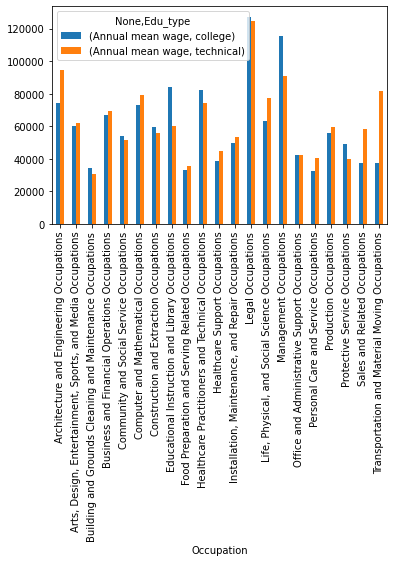

In [49]:
major_df1.groupby(['Occupation','Edu_type', ])[['Annual mean wage']].sum().unstack().plot.bar()

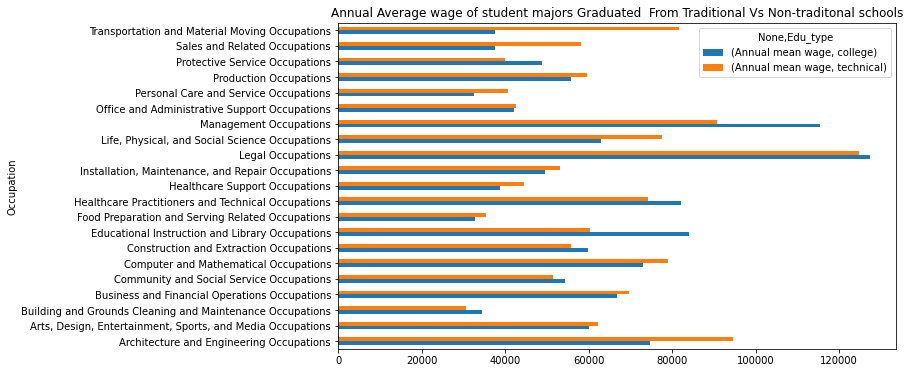

In [50]:
major_df1.groupby(['Occupation','Edu_type', ])[['Annual mean wage']].sum().unstack().plot.barh(figsize=(10, 6))
plt.title("Annual Average wage of student majors Graduated  From Traditional Vs Non-traditonal schools")
plt.show()

Minor 

In [51]:
# for minor degrees
minor_df = df[df.Group == 'minor'][['Occupation']].value_counts().to_frame().reset_index()
# minor_df = minor_df[minor_df['O'] > 1]
# major_df = major_df.astype('string')
df_minor = minor_df.head(15)
minor_list = list(df_minor.Occupation)

In [52]:
minor = df[df.Occupation.isin(minor_list)]
minor

,Occupation,Group,Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE,Edu_type
6,"Advertising, Marketing, Promotions, Public Rel...",minor,$50.53,$60.46,"$125,760",5.3%,technical
11,Operations Specialties Managers,minor,$45.82,$49.13,"$102,190",3.0%,technical
20,Other Management Occupations,minor,$37.19,$40.55,"$84,340",1.2%,technical
143,Other Educational Instruction and Library Occu...,minor,(4),(4),"$58,110",2.3%,technical
155,Media and Communication Workers,minor,$31.69,$36.22,"$75,340",5.4%,technical
161,Media and Communication Equipment Workers,minor,$14.82,$18.87,"$39,250",23.7%,technical
173,Other Healthcare Support Occupations,minor,$22.99,$22.08,"$45,920",9.7%,technical
180,Other Protective Service Workers,minor,$17.72,$18.82,"$39,150",1.7%,technical
195,Other Food Preparation and Serving Related Wor...,minor,$13.01,$13.96,"$29,030",8.3%,technical
254,"Material Recording, Scheduling, Dispatching, a...",minor,$18.05,$21.05,"$43,780",5.4%,technical


In [53]:
minor_df1 = minor.groupby(['Edu_type', 'Occupation'])[['Annual mean wage']].sum().reset_index()
minor_df1['Annual mean wage'] = minor_df1['Annual mean wage'].str.replace("$","",regex=False).str.replace(",","",regex=False).astype(int)
minor_df1

,Edu_type,Occupation,Annual mean wage
0,college,"Advertising, Marketing, Promotions, Public Rel...",116200
1,college,"Material Recording, Scheduling, Dispatching, a...",44830
2,college,Media and Communication Equipment Workers,48630
3,college,Media and Communication Workers,64150
4,college,Metal Workers and Plastic Workers,57060
5,college,Motor Vehicle Operators,37330
6,college,Operations Specialties Managers,116760
7,college,Other Educational Instruction and Library Occu...,43090
8,college,Other Food Preparation and Serving Related Wor...,29430
9,college,Other Healthcare Support Occupations,39270


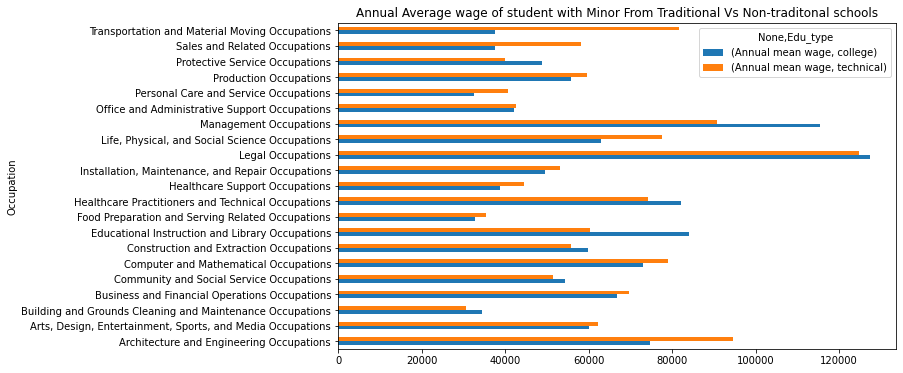

In [54]:
major_df1.groupby(['Occupation','Edu_type', ])[['Annual mean wage']].sum().unstack().plot.barh(figsize=(10, 6))
plt.title("Annual Average wage of student with Minor From Traditional Vs Non-traditonal schools")
plt.show()

Lets try to run some statistical analysis

In [55]:
df_combined = pd.concat([major_df1, minor_df1], ignore_index=True)
df_combined
#pingouin.ttest(A["A"], 56)

,Edu_type,Occupation,Annual mean wage
0,college,Architecture and Engineering Occupations,74610
1,college,"Arts, Design, Entertainment, Sports, and Media...",60100
2,college,Building and Grounds Cleaning and Maintenance ...,34460
3,college,Business and Financial Operations Occupations,66830
4,college,Community and Social Service Occupations,54290
...,...,...,...
67,technical,"Other Installation, Maintenance, and Repair Oc...",43560
68,technical,Other Management Occupations,84340
69,technical,Other Office and Administrative Support Workers,39450
70,technical,Other Production Occupations,64680


In [56]:
df_college = df_combined[df_combined.Edu_type == "college"]
df_technical = df_combined[df_combined.Edu_type == "technical"]

In [57]:
pingouin.ttest(df_college["Annual mean wage"], df_technical["Annual mean wage"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.244843,70,two-sided,0.807294,"[-13838.08, 10811.97]",0.05771,0.249,0.056708


In [58]:
# 61640	
# 71340
pingouin.ttest(df_college["Annual mean wage"], 71340)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.583784,35,two-sided,0.014106,"[50141.62, 68796.15]",0.430631,3.162,0.709666


In [59]:
pingouin.ttest(df_technical["Annual mean wage"], 61640)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.15923,35,two-sided,0.874403,"[52592.03, 69371.86]",0.026538,0.181,0.052753


In [60]:
t_test = pingouin.ttest(df_college["Annual mean wage"], df_technical["Annual mean wage"])
t_test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.244843,70,two-sided,0.807294,"[-13838.08, 10811.97]",0.05771,0.249,0.056708
